# NBA Team Clustering Analysis Project

Within the NBA, there are many different types of team play styles. For instance, some teams focus on three point shooting, while others emphasize defense and rebounding. The goal of this project is to use dimensionality reduction and K-means clustering analysis to identify distinct clusters of different team play styles throughout the NBA. Furthermore, by comparing the different play styles with total wins within the league, it is possible to see whether there is a dominant team play style or set of styles in the NBA. Finally, by performing this analysis on historical data dating back to the 1976 season (first season after the merger between the ABA and NBA), it is possible to identify trends in how the play style of the league as a whole has shifted over time.

Creators: Karthik Guruvayurappan and Akshay Gopalkrishnan

Data Source: basketball-reference.com

In [11]:
# import necessary packages for data analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

### Formatting Datasets from basketball-reference.com into Dictionary

This cell formats all of the datasets collected from basketball-reference.com into a dictionary format. To access the datasets, the keys are in the format: 'Year Type'. The datasets are read in as pandas DataFrames

Available Years Include: 1976, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019

Available Dataset Types Include: Team, Opponent, Misc, Standings

A sample statement to access a dataset would be: team_2019 = datasets['2019 Team']

In [15]:
# create a list to hold all dataset names
dataset_list = []

# adds all CSV files from the datasets folder to a list
for dataset in os.listdir('./Datasets'):
    if (dataset.endswith('.csv')):
        dataset_list.append(dataset)

# adds all datasets to a dictionary with the key being 'Year Type' 
datasets = {}
for dataset in dataset_list:
    data_file = pd.read_csv('./Datasets/' + dataset)
    dataset_name = dataset[dataset.index('- ') + 1 : dataset.index('.')].strip()
    datasets[dataset_name] = data_file

### Exploratory Data Analysis



In [13]:
# preview 2019 Team Dataset
team_2019 = datasets['2019 Team']
team_2019.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1


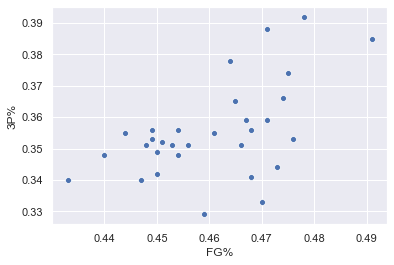

In [14]:
# plot FG% against 3P% for 2019 Team Data
sns.scatterplot(x='FG%', y='3P%', data=team_2019)

### Sample K-Means Analysis

In [18]:
# isolate necessary features from the Team 2019 dataset
team_2019_features = team_2019.drop(['Rk', 'Team', 'G', 'MP'], axis=1)
team_2019_features.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,43.4,91.1,0.476,13.5,38.2,0.353,29.9,52.9,0.565,17.9,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,44.0,89.8,0.491,13.3,34.4,0.385,30.8,55.3,0.557,16.3,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,43.7,92.2,0.473,10.3,29.9,0.344,33.4,62.4,0.536,17.8,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,41.5,88.2,0.471,10.8,30.2,0.359,30.7,58.0,0.529,21.2,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,41.3,87.5,0.471,10.0,25.8,0.388,31.3,61.7,0.507,22.6,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1


In [23]:
# generate sample Kmeans using 2019 Team Data
kmeans = KMeans(n_clusters=5).fit(team_2019_features)
kmeans.cluster_centers_

array([[ 43.7       ,  90.45      ,   0.4835    ,  13.4       ,
         36.3       ,   0.369     ,  30.35      ,  54.1       ,
          0.561     ,  17.1       ,  21.8       ,   0.787     ,
          9.5       ,  38.45      ,  47.95      ,  27.7       ,
          7.55      ,   6.15      ,  14.1       ,  20.5       ,
        117.9       ],
       [ 40.71538462,  89.14615385,   0.457     ,  11.98461538,
         34.        ,   0.35253846,  28.73076923,  55.14615385,
          0.52130769,  17.32307692,  22.78461538,   0.76084615,
         10.5       ,  34.76923077,  45.27692308,  24.96153846,
          7.55384615,   4.90769231,  14.13076923,  20.75384615,
        110.73076923],
       [ 42.34444444,  90.64444444,   0.46711111,  10.56666667,
         29.34444444,   0.36133333,  31.77777778,  61.28888889,
          0.51855556,  18.61111111,  24.33333333,   0.76466667,
         10.86666667,  35.6       ,  46.46666667,  24.93333333,
          7.53333333,   5.01111111,  14.03333333,  21.    

In [19]:
team_2010_pand = datasets['2019 Misc']
team_2010_pand = team_2010_pand.drop(0)
#team_2010_pand = team_2010_pand.drop(['Rk','Team','Age', 'PW', 'PL', 'MOV', 'SOS', 'SRS'], axis = 1)


#team_2010 = datasets['2010 Team'].to_numpy()
#misc_2010 = datasets['2010 Misc'].to_numpy()
#oppon_2010 = datasets['2010 Opponent']


In [ ]:
team_2010_std = StandardScaler().fit_transform(team_2010_pand)
pca = PCA(n_components=2)
pc = pca.fit_transform(team_2010_std)
PCA_components = pd.DataFrame(pc)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
team_2010_pan

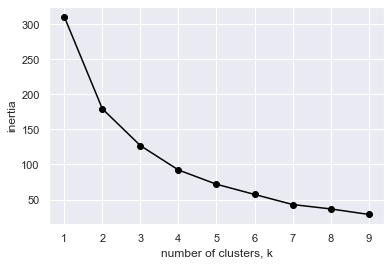

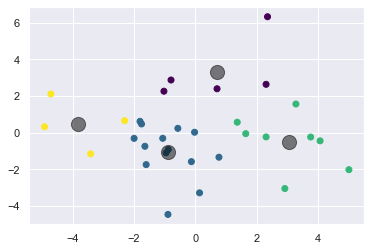

In [91]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

#Plotting graph to find the elbow point for K-means
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_components)
y_kmeans = kmeans.predict(PCA_components)
plt.scatter(PCA_components.to_numpy()[:,0], PCA_components.to_numpy()[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

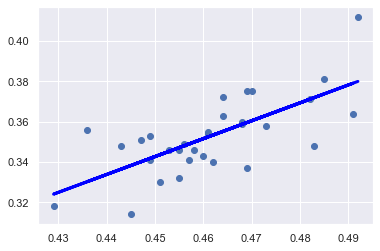

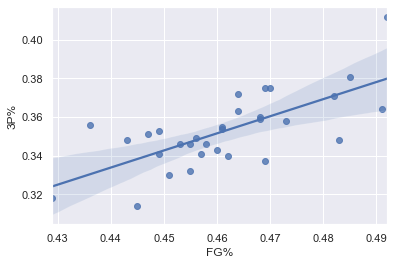

In [45]:
fg_percent = team_2010['FG%'].to_numpy().reshape(-1,1)
threep_percent = team_2010['3P%'].to_numpy().reshape(-1,1)
reg = LinearRegression()
reg.fit(fg_percent, threep_percent)
reg_pred = reg.predict(fg_percent)
plt.scatter(fg_percent, threep_percent)
plt.plot(fg_percent, reg_pred, color='blue', linewidth=3)
plt.show()
sample_plot = sns.regplot(x = 'FG%', y = '3P%', data = team_2010)



